In [1]:
import indicoio, json, re
from urlextract import URLExtract
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import datetime
from empath import Empath
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from gensim import corpora
from gensim.models import LsiModel
from gensim.models import LdaModel
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim.models.coherencemodel import CoherenceModel
import plotly.plotly.plotly
from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go
import plotly.io as pio
import plotly.plotly as py
import plotly.graph_objs as go
analyser = SentimentIntensityAnalyzer()
lexicon = Empath()
nltk.download('stopwords')




[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Chris\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
indicoio.config.api_key = '797527d8dbe8cbb44e9a4019cd690afd'


In [6]:
with open('result.json', 'r') as myfile:
    data = json.loads(myfile.read())


count = 0
    
for x in data['comments']:
    count += 1

print("Number of comments in our dataset")
print(count)
    
    

Number of comments in our dataset
50500


In [7]:
extractor = URLExtract()

timestamp = []
sentiment = []
political = []



num = 0
for x in data['comments']:
    num += 1
    
    # TEXT CLEANING
    input_str = data['comments'][x]['body'].lower() # all letters become lowercase 
    
    url = extractor.find_urls(input_str)          # extracts and removes url
    if(len(url) != 0):
        input_str = input_str.replace(url[0],'')

    input_str = re.sub(r'\d+', '', input_str)     # removes numbers
    input_str = input_str.strip()                 # removes whitespace
    input_str = re.sub(r'[^\w\s]', '', input_str)   # removes punctuation
    
    
    
    # STORING THE TIMESTAMP, SENTIMENT, POLITICAL DATA IN SEPARATE LISTS
    if( 'timestamp' in data['comments'][x] and input_str):
        timestamp.append(data['comments'][x]['timestamp'])
        #sentiment.append(indicoio.sentiment(input_str))
        #political.append(indicoio.political(input_str))
        
    data['comments'][x]['body'] = input_str

In [9]:
tokenizer = RegexpTokenizer(r'\w+')
# create English stop words list
en_stop = set(stopwords.words('english'))
# Create p_stemmer of class PorterStemmer
p_stemmer = PorterStemmer()
# list for tokenized documents in loop
texts = []
# loop through document list
for i in data['comments']:
    # clean and tokenize document string
    raw = data['comments'][i]['body'].lower()
    tokens = tokenizer.tokenize(raw)
    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in en_stop]
    # stem tokens
    stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
    # add tokens to list
    texts.append(stemmed_tokens)


dictionary = corpora.Dictionary(texts)
# Converting list of documents (corpus) into Document 
# Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in texts]
number_of_topics = 6
# generate LSA model
lsamodel = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
print(lsamodel.print_topics(num_topics=number_of_topics, num_words=15))


[(0, '0.633*"gun" + 0.270*"peopl" + 0.157*"would" + 0.154*"like" + 0.153*"dont" + 0.132*"right" + 0.124*"get" + 0.119*"one" + 0.111*"law" + 0.107*"think" + 0.103*"shoot" + 0.101*"make" + 0.099*"use" + 0.098*"go" + 0.097*"want"'), (1, '-0.704*"gun" + 0.307*"peopl" + 0.178*"like" + 0.167*"right" + 0.160*"dont" + 0.121*"would" + 0.109*"think" + 0.107*"say" + 0.104*"get" + 0.102*"im" + 0.095*"one" + 0.091*"school" + 0.085*"go" + 0.083*"thing" + 0.076*"make"'), (2, '0.654*"peopl" + -0.470*"right" + -0.180*"amend" + 0.174*"shoot" + 0.163*"school" + 0.153*"kill" + -0.144*"would" + -0.137*"law" + -0.126*"state" + -0.084*"constitut" + -0.083*"govern" + 0.080*"mass" + -0.079*"us" + -0.072*"second" + -0.067*"arm"'), (3, '-0.513*"peopl" + 0.479*"school" + -0.361*"right" + 0.275*"shoot" + 0.137*"one" + 0.124*"student" + 0.113*"fire" + -0.102*"amend" + 0.101*"high" + 0.093*"shot" + 0.092*"polic" + 0.090*"mass" + 0.086*"use" + -0.086*"gun" + 0.084*"year"'), (4, '0.394*"right" + -0.276*"dont" + 0.270*

In [8]:
with open('result.json', 'r') as myfile:
    data2 = json.loads(myfile.read())
    
extractor = URLExtract()

timestamp = []
sentiment = []
political = []

num = 0
for x in data2['comments']:
    num += 1
    
    # TEXT CLEANING
    input_str = data2['comments'][x]['body'].lower() # all letters become lowercase 
    
    url = extractor.find_urls(input_str)          # extracts and removes url
    if(len(url) != 0):
        input_str = input_str.replace(url[0],'')

    input_str = re.sub(r'\d+', '', input_str)     # removes numbers
    input_str = input_str.strip()                 # removes whitespace
    input_str = re.sub(r'[^\w\s]', '', input_str)   # removes punctuation
    
    
    
    # STORING THE TIMESTAMP, SENTIMENT, POLITICAL DATA IN SEPARATE LISTS
    if( 'timestamp' in data2['comments'][x] and input_str):
        timestamp.append(data2['comments'][x]['timestamp'])
        #sentiment.append(indicoio.sentiment(input_str))
        #political.append(indicoio.political(input_str))
        
    data2['comments'][x]['body'] = input_str
    
tokenizer = RegexpTokenizer(r'\w+')
# create English stop words list
en_stop = set(stopwords.words('english'))
# Create p_stemmer of class PorterStemmer
p_stemmer = PorterStemmer()
# list for tokenized documents in loop
texts = []
# loop through document list
for i in data2['comments']:
    # clean and tokenize document string
    raw = data2['comments'][i]['body'].lower()
    tokens = tokenizer.tokenize(raw)
    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in en_stop]
    # stem tokens
    stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
    # add tokens to list
    texts.append(stemmed_tokens)


KeyboardInterrupt: 

['soul', 'heart', 'beauty', 'thou', 'sea', 'outward', 'graceful', 'mother', 'souls', 'human']
['america', 'hardly', 'extent', 'democratic', 'states', 'population', 'parties', 'falls', 'americans', 'interests']


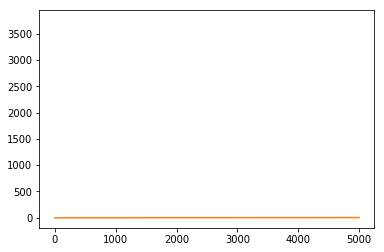

In [11]:
import sys
sys.path.append("C:\Git Folder\SAGE\py-sage")
import sage
from collections import Counter


def getCountDict(filename):
    with open(filename) as fin:
        return {word:int(count) for word,count in [line.rstrip().split() for line in fin.readlines()]}
    
# counts for author Lydia Maria Child
child_counts = getCountDict('underwood-child-counts.tsv')
# counts for all 1840s letters in the corpus 
base_counts = getCountDict('underwood-1840s-let-counts.tsv')

vocab = [word for word,count in Counter(child_counts).most_common(5000)]

x_child = np.array([child_counts[word] for word in vocab])
x_base = np.array([base_counts[word] for word in vocab]) + 1.

mu = np.log(x_base) - np.log(x_base.sum())

eta = sage.estimate(x_child,mu)

print(sage.topK(eta,vocab))

print(sage.topK(-eta,vocab))

plt.hist(eta,20);

plt.plot(sorted(eta));


